In [1]:
import os
import re
import pandas as pd

def read_chats(directory):
    chats = []
    for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            with open(os.path.join(directory, filename), 'r', encoding='utf-8') as file:
                chats.append(file.read())
    return chats

def clean_chat(chat):
    # Remove timestamps and sender names
    chat = re.sub(r'\d{1,2}/\d{1,2}/\d{2,4}, \d{2}:\d{2} - .*?: ', '', chat)
    # Remove non-text elements
    chat = re.sub(r'[^a-zA-Z\s]', '', chat)
    # Convert to lowercase
    chat = chat.lower()
    return chat

# Directory of chat files
directory = 'chats'

# Read and clean chat data
raw_chats = read_chats(directory)
cleaned_chats = [clean_chat(chat) for chat in raw_chats]


In [2]:
# Sample labels for the chat data (for illustration purposes)
emotion_labels = ['happy', 'happy', 'sad', 'Happy','sad','used','used','not real emotion','used','used','happy'] * (len(cleaned_chats) // 4 + 1)
situation_labels = ['personal', 'negative', 'positive', 'negative'] * (len(cleaned_chats) // 4 + 1)

# Create DataFrame
df = pd.DataFrame({'message': cleaned_chats, 'emotion': emotion_labels[:len(cleaned_chats)], 'situation': situation_labels[:len(cleaned_chats)]})


In [3]:
df

,message,emotion,situation
0,pm messages and calls are endtoend encrypte...,happy,personal
1,pm messages and calls are endtoend encrypte...,happy,negative
2,pm messages and calls are endtoend encrypte...,sad,positive
3,am messages and calls are endtoend encrypte...,Happy,negative
4,pm messages and calls are endtoend encrypte...,sad,personal
5,am messages and calls are endtoend encrypte...,used,negative
6,pm messages and calls are endtoend encrypte...,used,positive
7,pm messages and calls are endtoend encrypte...,not real emotion,negative
8,pm dhruv gupta hi\n pm dhruv gupta this i...,used,personal
9,pm messages and calls are endtoend encrypte...,used,negative


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Text Preprocessing with TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['message'])

# Emotion and Situation labels
y_emotion = df['emotion']
y_situation = df['situation']

# Train-test split for emotion
X_train_emotion, X_test_emotion, y_train_emotion, y_test_emotion = train_test_split(X, y_emotion, test_size=0.2, random_state=42)

# Train-test split for situation
X_train_situation, X_test_situation, y_train_situation, y_test_situation = train_test_split(X, y_situation, test_size=0.2, random_state=42)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train emotion detection model
emotion_model = LogisticRegression()
emotion_model.fit(X_train_emotion, y_train_emotion)

# Train situation detection model
situation_model = LogisticRegression()
situation_model.fit(X_train_situation, y_train_situation)


LogisticRegression()

In [7]:
# Predictions for emotion
y_pred_emotion = emotion_model.predict(X_test_emotion)
print("Emotion Detection Model Evaluation:")
print(classification_report(y_test_emotion, y_pred_emotion))
print(confusion_matrix(y_test_emotion, y_pred_emotion))

# Predictions for situation
y_pred_situation = situation_model.predict(X_test_situation)
print("Situation Detection Model Evaluation:")
print(classification_report(y_test_situation, y_pred_situation))
print(confusion_matrix(y_test_situation, y_pred_situation))


Emotion Detection Model Evaluation:
              precision    recall  f1-score   support

       happy       0.00      0.00      0.00         2
        used       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3

[[0 2]
 [0 1]]
Situation Detection Model Evaluation:
              precision    recall  f1-score   support

    negative       0.33      1.00      0.50         1
    personal       0.00      0.00      0.00         1
    positive       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3

[[1 0 0]
 [1 0 0]
 [1 0 0]]


/Users/shikarichacha/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/shikarichacha/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/shikarichacha/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [9]:
import joblib

# Save the models and TF-IDF vectorizer
joblib.dump(emotion_model, 'emotion_model.pkl')
joblib.dump(situation_model, 'situation_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


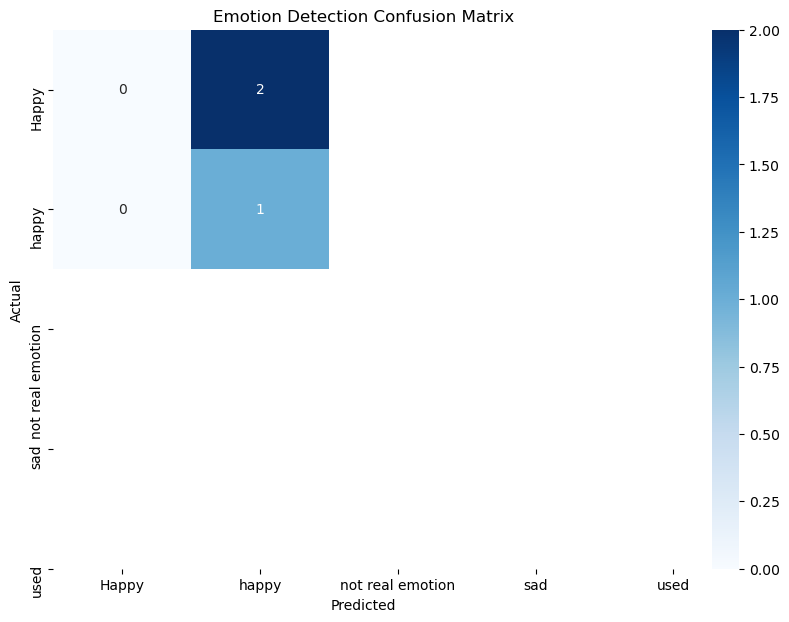

In [12]:
# Confusion matrix for emotion
emotion_cm = confusion_matrix(y_test_emotion, y_pred_emotion)
plt.figure(figsize=(10, 7))
sns.heatmap(emotion_cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_model.classes_, yticklabels=emotion_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Emotion Detection Confusion Matrix')
plt.show()


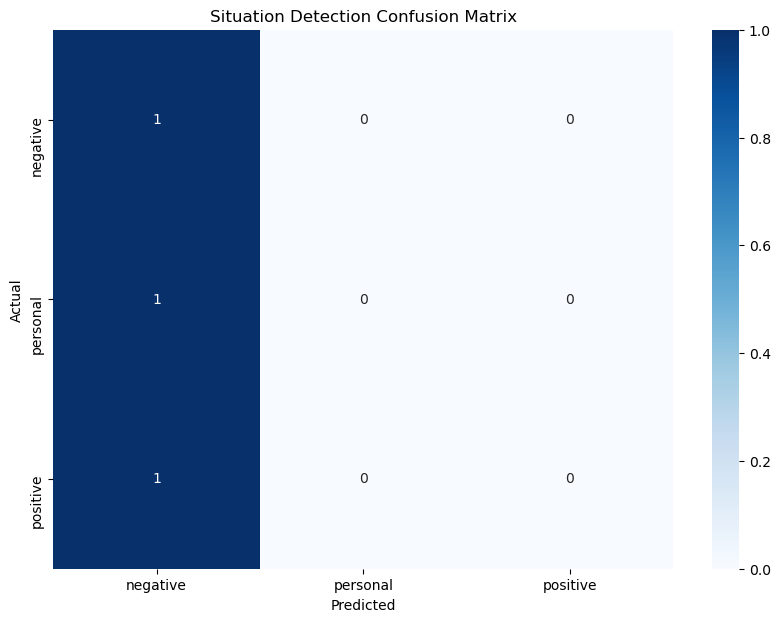

In [14]:
# Confusion matrix for situation
situation_cm = confusion_matrix(y_test_situation, y_pred_situation)
plt.figure(figsize=(10, 7))
sns.heatmap(situation_cm, annot=True, fmt='d', cmap='Blues', xticklabels=situation_model.classes_, yticklabels=situation_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Situation Detection Confusion Matrix')
plt.show()

/Users/shikarichacha/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/shikarichacha/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/shikarichacha/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

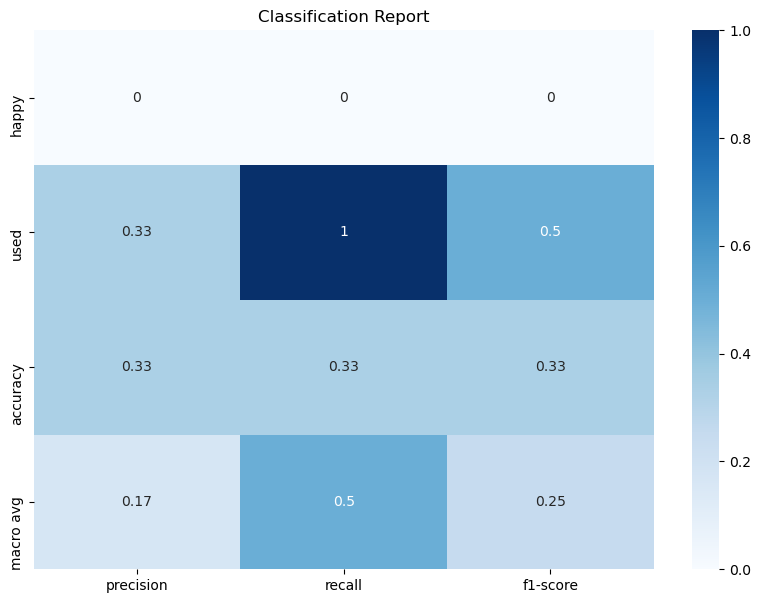

/Users/shikarichacha/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/shikarichacha/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/shikarichacha/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

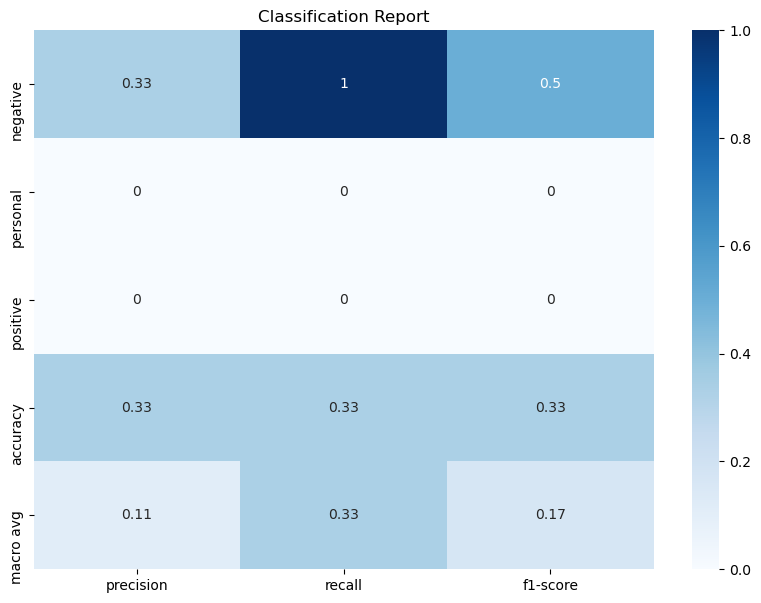

In [15]:
def plot_classification_report(y_true, y_pred, classes):
    report = classification_report(y_true, y_pred, output_dict=True)
    df = pd.DataFrame(report).transpose()
    
    plt.figure(figsize=(10, 7))
    sns.heatmap(df.iloc[:-1, :-1], annot=True, cmap='Blues')
    plt.title('Classification Report')
    plt.show()

# Plot classification report for emotion
plot_classification_report(y_test_emotion, y_pred_emotion, emotion_model.classes_)

# Plot classification report for situation
plot_classification_report(y_test_situation, y_pred_situation, situation_model.classes_)


# Test

In [17]:
import re
import joblib
import pandas as pd
import numpy as np

# Load the models and TF-IDF vectorizer
emotion_model = joblib.load('emotion_model.pkl')
situation_model = joblib.load('situation_model.pkl')
tfidf = joblib.load('tfidf_vectorizer.pkl')

def clean_chat(chat):
    # Remove timestamps and sender names
    chat = re.sub(r'\d{1,2}/\d{1,2}/\d{2,4}, \d{2}:\d{2} - .*?: ', '', chat)
    # Remove non-text elements
    chat = re.sub(r'[^a-zA-Z\s]', '', chat)
    # Convert to lowercase
    chat = chat.lower()
    return chat

def predict_emotion_and_situation(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        raw_chat = file.read()
        
    # Split chat into individual messages
    chat_messages = raw_chat.split('\n')
    cleaned_chats = [clean_chat(msg) for msg in chat_messages if msg.strip() != '']
    
    # Transform the chat messages using the TF-IDF vectorizer
    vectorized_chats = tfidf.transform(cleaned_chats)
    
    # Predict emotions for each message
    emotion_predictions = emotion_model.predict(vectorized_chats)
    
    # Aggregate the vectorized data for situation prediction
    aggregated_vector = vectorized_chats.mean(axis=0)
    aggregated_vector = np.asarray(aggregated_vector)  # Convert to numpy array
    situation_prediction = situation_model.predict(aggregated_vector)
    
    return emotion_predictions, situation_prediction[0]

# Example usage
file_path = 'WhatsApp Chat with Akanksha Pandey MVIT.txt'
emotions, situation = predict_emotion_and_situation(file_path)

# Output the results
print("Emotions for each message:")
print(emotions)
print("\nOverall situation:")
print(situation)


Emotions for each message:
['used' 'happy' 'happy' 'happy' 'happy' 'happy' 'happy' 'happy' 'happy'
 'happy' 'used' 'used' 'happy' 'happy' 'used' 'used' 'happy' 'happy'
 'used' 'used' 'happy' 'used' 'happy' 'used' 'happy' 'used' 'happy' 'used'
 'happy' 'used' 'used' 'happy' 'used' 'used' 'happy' 'used' 'used' 'happy'
 'used' 'used' 'used' 'used' 'used' 'happy' 'used' 'used' 'used' 'happy'
 'used' 'used' 'used' 'used' 'happy' 'used' 'happy' 'used' 'used' 'used'
 'happy' 'happy' 'used' 'happy' 'used' 'used' 'happy' 'happy' 'happy'
 'used' 'used' 'happy' 'used' 'happy' 'happy' 'happy' 'happy' 'used'
 'used' 'used' 'happy' 'used' 'happy' 'happy' 'used' 'happy' 'used'
 'happy' 'used' 'happy' 'used' 'used' 'happy' 'used' 'happy' 'used'
 'happy' 'happy' 'used' 'used' 'happy' 'used' 'happy' 'happy' 'happy'
 'used' 'happy' 'happy' 'used' 'used' 'happy' 'used' 'used' 'used' 'used'
 'used' 'used' 'used' 'used' 'happy' 'used' 'used' 'used' 'happy' 'happy'
 'used' 'used' 'used' 'used' 'used' 'used' 

In [1]:
import sys
import re
import joblib
from PyQt5.QtWidgets import QApplication, QWidget, QPushButton, QVBoxLayout, QLabel, QTextEdit, QFileDialog
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the models and TF-IDF vectorizer
emotion_model = joblib.load('emotion_model.pkl')
situation_model = joblib.load('situation_model.pkl')
tfidf = joblib.load('tfidf_vectorizer.pkl')

def clean_chat(chat):
    # Remove timestamps and sender names
    chat = re.sub(r'\d{1,2}/\d{1,2}/\d{2,4}, \d{2}:\d{2} - .*?: ', '', chat)
    # Remove non-text elements
    chat = re.sub(r'[^a-zA-Z\s]', '', chat)
    # Convert to lowercase
    chat = chat.lower()
    return chat

class ChatAnalyzerApp(QWidget):
    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        self.setWindowTitle('Chat Analyzer')
        self.setGeometry(100, 100, 600, 400)

        self.text_area = QTextEdit()
        self.text_area.setPlaceholderText("Paste or load your chat history here...")

        self.load_button = QPushButton('Load Chat File')
        self.load_button.clicked.connect(self.load_chat_file)

        self.analyze_button = QPushButton('Analyze')
        self.analyze_button.clicked.connect(self.analyze_chat)

        self.result_label = QLabel('Emotions:')
        self.result_text = QTextEdit()
        self.result_text.setReadOnly(True)

        self.situation_label = QLabel('Overall Situation:')
        self.situation_text = QLabel()

        layout = QVBoxLayout()
        layout.addWidget(self.text_area)
        layout.addWidget(self.load_button)
        layout.addWidget(self.analyze_button)
        layout.addWidget(self.result_label)
        layout.addWidget(self.result_text)
        layout.addWidget(self.situation_label)
        layout.addWidget(self.situation_text)

        self.setLayout(layout)

    def load_chat_file(self):
        file_dialog = QFileDialog()
        file_dialog.setNameFilter("Text files (*.txt)")
        if file_dialog.exec_():
            file_path = file_dialog.selectedFiles()[0]
            with open(file_path, 'r', encoding='utf-8') as file:
                chat_history = file.read()
                self.text_area.setPlainText(chat_history)

    def analyze_chat(self):
        chat_history = self.text_area.toPlainText()
        cleaned_chat = clean_chat(chat_history)
        vectorized_chat = tfidf.transform([cleaned_chat])
        
        emotion_prediction = emotion_model.predict(vectorized_chat)
        situation_prediction = situation_model.predict(vectorized_chat)

        self.result_text.setPlainText(emotion_prediction[0])
        self.situation_text.setText(situation_prediction[0])

if __name__ == '__main__':
    app = QApplication(sys.argv)
    window = ChatAnalyzerApp()
    window.show()
    sys.exit(app.exec_())


SystemExit: 0

/Users/shikarichacha/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [1]:
import sys
import re
import joblib
import random
from PyQt5.QtWidgets import QApplication, QWidget, QPushButton, QVBoxLayout, QLabel, QTextEdit, QFileDialog, QMessageBox
from sklearn.feature_extraction.text import TfidfVectorizer
import openai  # assuming you have OpenAI installed and configured

# Load the models and TF-IDF vectorizer
emotion_model = joblib.load('emotion_model.pkl')
situation_model = joblib.load('situation_model.pkl')
tfidf = joblib.load('tfidf_vectorizer.pkl')

# Predefined responses for the bot
R_EATING = {
    'english': "I don't eat anything, I'm just a bot!",
    'hinglish': "Bhai, main kuch nahi khata, main to ek bot hoon!",
    'desi': "Bhai, kuch nahi khata, bas chalta firta bot hoon!"
}

R_ADVICE = {
    'english': "If I were you, I would search on Google, bro!",
    'hinglish': "Agar main teri jagah hota, to Google pe search karta bhai!",
    'desi': "Bhai, tu Google pe search kar le, kuch mil jayega!"
}

def clean_chat(chat):
    # Function to clean chat history for analysis
    chat = re.sub(r'\d{1,2}/\d{1,2}/\d{2,4}, \d{2}:\d{2} - .*?: ', '', chat)
    chat = re.sub(r'[^a-zA-Z\s]', '', chat)
    chat = chat.lower()
    return chat

def get_response(user_input):
    # Function to get response from the bot based on user input
    split_message = re.split(r'\s+|[,;?!.-]\s*', user_input.lower())
    response = check_all_messages(split_message)
    return response

def generate_openai_response(prompt):
    # Function to generate response using OpenAI's language model
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=prompt,
        max_tokens=150,
        n=1,
        stop=None,
        temperature=0.9
    )
    return response.choices[0].text.strip()

def check_all_messages(message):
    # Function to check predefined responses for recognized patterns
    highest_prob_list = {}

    def response(bot_response, list_of_words, single_response=False, required_words=[]):
        nonlocal highest_prob_list
        highest_prob_list[bot_response] = message_probability(message, list_of_words, single_response, required_words)

    response('Namaste!', ['hello', 'hi', 'hey', 'sup', 'heyo'], single_response=True)
    response('Phir milte hain!', ['bye', 'goodbye'], single_response=True)
    response('Main theek hoon, aur tu?', ['how', 'are', 'you', 'doing'], required_words=['how'])
    response('Arre bhai, koi baat nahi!', ['thank', 'thanks'], single_response=True)
    response('Shukriya!', ['i', 'love', 'code', 'palace'], required_words=['code', 'palace'])

    response(R_ADVICE['english'], ['give', 'advice'], required_words=['advice'])
    response(R_ADVICE['hinglish'], ['de', 'salah'], required_words=['salah'])
    response(R_ADVICE['desi'], ['de', 'salah'], required_words=['salah'])

    response(R_EATING['english'], ['do', 'you', 'eat'], required_words=['you', 'eat'])
    response(R_EATING['hinglish'], ['kya', 'tu', 'khata'], required_words=['tu', 'khata'])
    response(R_EATING['desi'], ['kya', 'tu', 'khata'], required_words=['tu', 'khata'])

    best_match = max(highest_prob_list, key=highest_prob_list.get)
    return unknown() if highest_prob_list[best_match] < 1 else best_match

def message_probability(user_message, recognised_words, single_response=False, required_words=[]):
    # Function to calculate message probability based on recognized words
    message_certainty = 0
    has_required_words = True

    for word in user_message:
        if word in recognised_words:
            message_certainty += 1

    percentage = float(message_certainty) / float(len(recognised_words))

    for word in required_words:
        if word not in user_message:
            has_required_words = False
            break

    if has_required_words or single_response:
        return int(percentage * 100)
    else:
        return 0

def unknown():
    # Function to handle unknown inputs
    response = [
        "Arre bhai, kya bol raha hai?",
        "...",
        "Sahi lagta hai.",
        "Iska kya matlab?"
    ][random.randrange(4)]
    return response

class ChatAnalyzerApp(QWidget):
    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        self.setWindowTitle('Chat Analyzer')
        self.setGeometry(100, 100, 600, 400)

        self.text_area = QTextEdit()
        self.text_area.setPlaceholderText("Paste or load your chat history here...")

        self.load_button = QPushButton('Load Chat File')
        self.load_button.clicked.connect(self.load_chat_file)

        self.analyze_button = QPushButton('Analyze')
        self.analyze_button.clicked.connect(self.analyze_chat)

        self.response_label = QLabel('Your Response:')
        self.response_text = QTextEdit()

        self.bot_response_label = QLabel('Bot Response:')
        self.bot_response_text = QTextEdit()
        self.bot_response_text.setReadOnly(True)

        layout = QVBoxLayout()
        layout.addWidget(self.text_area)
        layout.addWidget(self.load_button)
        layout.addWidget(self.analyze_button)
        layout.addWidget(self.response_label)
        layout.addWidget(self.response_text)
        layout.addWidget(self.bot_response_label)
        layout.addWidget(self.bot_response_text)

        self.setLayout(layout)

    def load_chat_file(self):
        file_dialog = QFileDialog()
        file_dialog.setNameFilter("Text files (*.txt)")
        if file_dialog.exec_():
            file_path = file_dialog.selectedFiles()[0]
            with open(file_path, 'r', encoding='utf-8') as file:
                chat_history = file.read()
                self.text_area.setPlainText(chat_history)

    def analyze_chat(self):
        chat_history = self.text_area.toPlainText()
        cleaned_chat = clean_chat(chat_history)
        vectorized_chat = tfidf.transform([cleaned_chat])

        emotion_prediction = emotion_model.predict(vectorized_chat)
        situation_prediction = situation_model.predict(vectorized_chat)

        self.response_text.clear()
        self.bot_response_text.clear()

        self.response_text.setPlainText("Write your response here...")

        self.bot_response_text.setPlainText(f"Emotion: {emotion_prediction[0]}\nSituation: {situation_prediction[0]}\n\nWaiting for your response...")

    def keyPressEvent(self, event):
        if event.key() == 16777220 or event.key() == 16777221:  # Enter key
            self.send_response()

    def send_response(self):
        user_response = self.response_text.toPlainText()
        if user_response.strip():
            self.bot_response_text.append(f"\nUser: {user_response}")
            bot_response = get_response(user_response)
            if bot_response == unknown():
                bot_response = generate_openai_response(user_response)
            self.bot_response_text.append(f"Bot: {bot_response}")
        else:
            QMessageBox.warning(self, 'Warning', 'Please enter a valid response.')

if __name__ == '__main__':
    app = QApplication(sys.argv)
    window = ChatAnalyzerApp()
    window.show()
    sys.exit(app.exec_())


2024-06-21 19:53:05.148 python[40378:4526406] TSM AdjustCapsLockLEDForKeyTransitionHandling - _ISSetPhysicalKeyboardCapsLockLED Inhibit


SystemExit: 0

/Users/shikarichacha/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
